In [1]:
import numpy as np
import pandas as pd 


from matplotlib import pyplot as plt
import seaborn as sns
sns.set()


import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, confusion_matrix, auc

In [2]:
data = pd.read_csv('../input/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data.loc[data['sex']==0, 'sex'] = 'female'
data.loc[data['sex']==1, 'sex'] = 'male'

data.loc[data['cp'] == 0, 'cp'] = 'typical angina'
data.loc[data['cp'] == 1, 'cp'] = 'atypical angina'
data.loc[data['cp'] == 2, 'cp'] = 'non-anginal pain'
data.loc[data['cp'] == 3, 'cp'] = 'asymptomatic'

data.loc[data['restecg'] == 0, 'restecg'] = 'normal'
data.loc[data['restecg'] == 1, 'restecg'] = 'ST-T wave abnormality'
data.loc[data['restecg'] == 2, 'restecg'] = 'left ventricular hypertrophy'

data.loc[data['slope'] == 0, 'slope'] = 'upsloping'
data.loc[data['slope'] == 1, 'slope'] = 'flat'
data.loc[data['slope'] == 2, 'slope'] = 'downsloping'

data.loc[data['thal'] == 0, 'thal'] = 'normal'     # no info about 0 so we assume its normal
data.loc[data['thal'] == 1, 'thal'] = 'normal'
data.loc[data['thal'] == 2, 'thal'] = 'fixed defect'
data.loc[data['thal'] == 3, 'thal'] = 'reversable defect'


In [5]:
listed = ['sex', 'cp', 'restecg', 'slope', 'thal']
for i in listed:
    print('\n',i, '\n')
    print(data[i].value_counts())



 sex 

male      207
female     96
Name: sex, dtype: int64

 cp 

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: cp, dtype: int64

 restecg 

ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: restecg, dtype: int64

 slope 

downsloping    142
flat           140
upsloping       21
Name: slope, dtype: int64

 thal 

fixed defect         166
reversable defect    117
normal                20
Name: thal, dtype: int64


In [6]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'ca', 'target'], dtype='object'),
 dtype('float64'): Index(['oldpeak'], dtype='object'),
 dtype('O'): Index(['sex', 'cp', 'restecg', 'slope', 'thal'], dtype='object')}

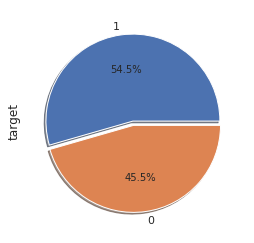

In [7]:
data.target.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', explode = [0,0.05], shadow = True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


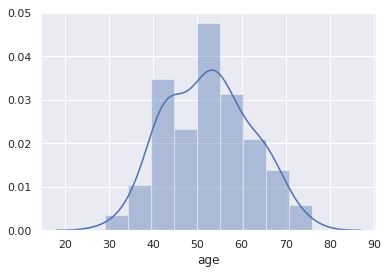

In [8]:
sns.distplot(data.loc[data['target'] == 1, 'age'])

In [9]:
checkname = {
    'age' : 'AGE',
    'trestbps' : ' resting blood pressure (mm Hg)',
    'chol' : 'Cholesterol (mg/dl)',
    'fbs' : 'Fasting blood sugar',
    'thalach' : 'maximum heart rate achieved',
    'exang' :  ' Exercise induced angina ',
    'ca' : 'number of major vessels'
}

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


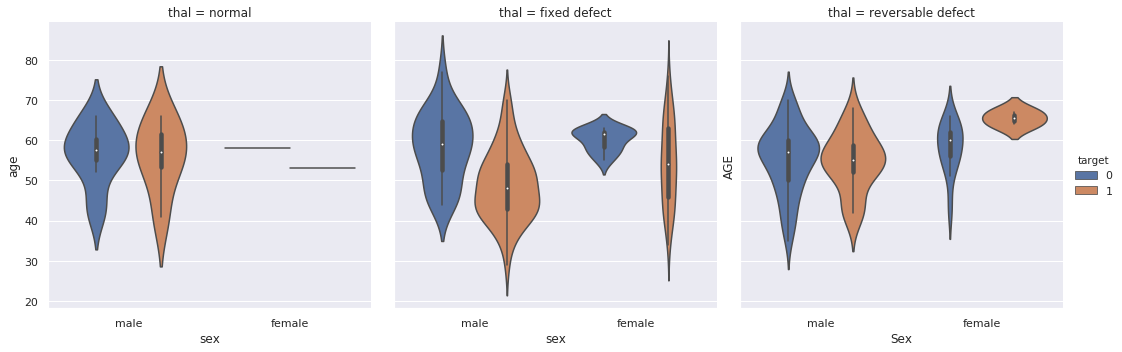

In [10]:
sns.catplot(x = 'sex',y = 'age', hue = 'target', col = 'thal', kind = 'violin', data = data)
plt.xlabel('Sex')
plt.ylabel(checkname['age'])
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


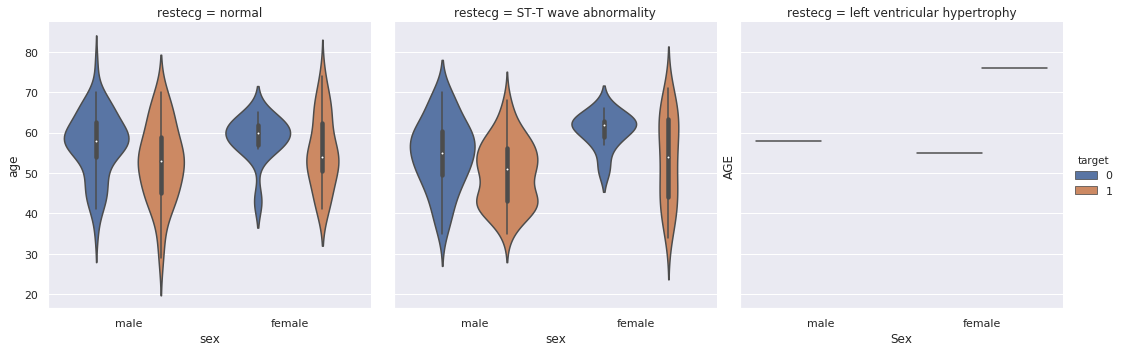

In [11]:
sns.catplot(x = 'sex',y = 'age', hue = 'target', col = 'restecg', kind = 'violin', data = data)
plt.xlabel('Sex')
plt.ylabel(checkname['age'])
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


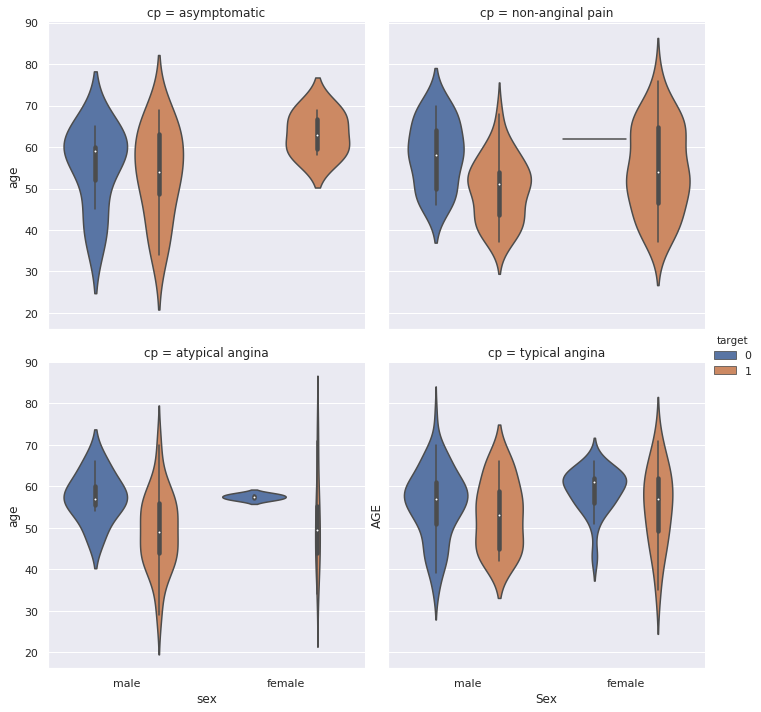

In [12]:
sns.catplot(x = 'sex',y = 'age', hue = 'target', col = 'cp', kind = 'violin', col_wrap=2, data = data)
plt.xlabel('Sex')
plt.ylabel(checkname['age'])
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


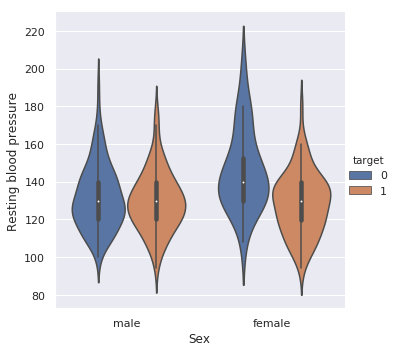

In [13]:
sns.catplot(x = 'sex',y = 'trestbps', hue = 'target',  kind = 'violin',data = data)
plt.xlabel('Sex')
plt.ylabel('Resting blood pressure')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


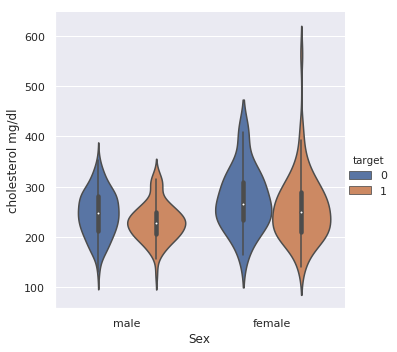

In [14]:
sns.catplot(x = 'sex',y = 'chol', hue = 'target',  kind = 'violin',data = data)
plt.xlabel('Sex')
plt.ylabel('cholesterol mg/dl')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


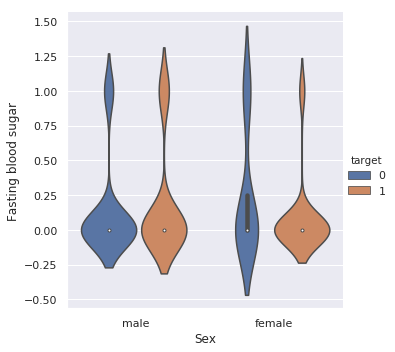

In [15]:
sns.catplot(x = 'sex',y = 'fbs', hue = 'target',  kind = 'violin',data = data)
plt.xlabel('Sex')
plt.ylabel(checkname['fbs'])
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


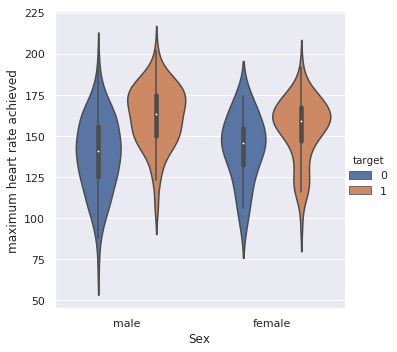

In [16]:
sns.catplot(x = 'sex',y = 'thalach', hue = 'target',  kind = 'violin',data = data)
plt.xlabel('Sex')
plt.ylabel(checkname['thalach'])
plt.show()

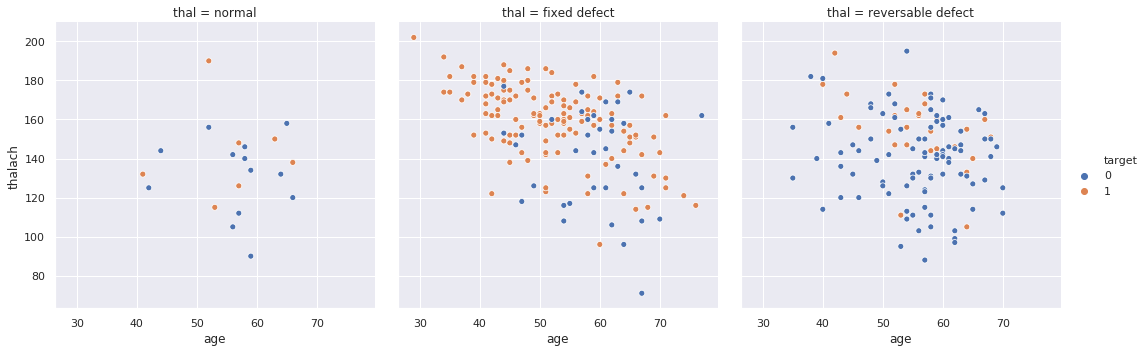

In [17]:
sns.relplot(x="age", y="thalach", hue = 'target', col = 'thal',  kind = 'scatter', data=data)

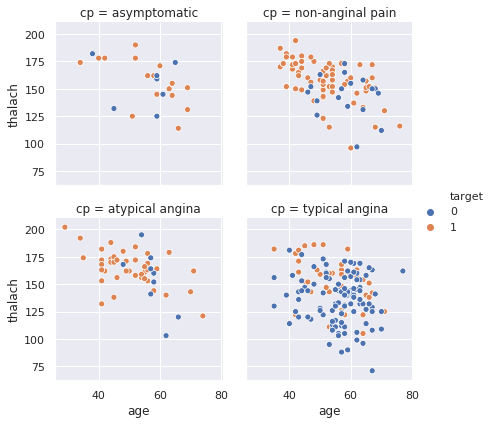

In [18]:
sns.relplot(x="age", y="thalach", hue = 'target', col = 'cp',  kind = 'scatter', col_wrap = 2, height = 3, data = data)

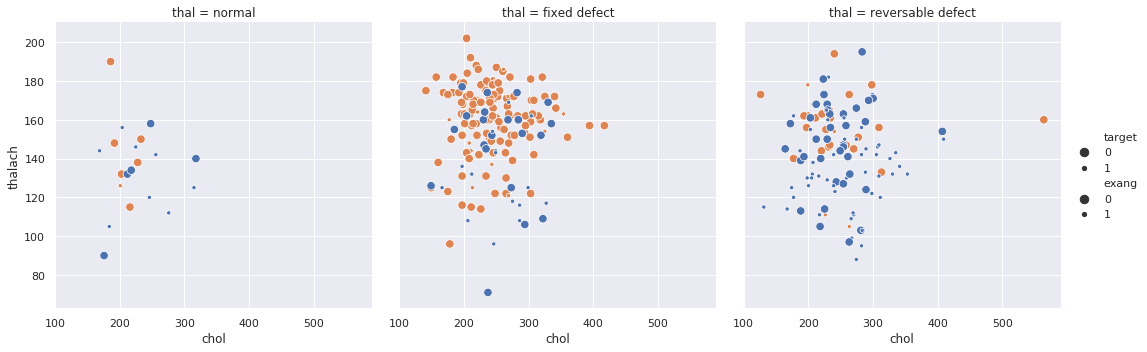

In [19]:
sns.relplot(x="chol", y="thalach", hue = 'target', size = 'exang', col = 'thal',  kind = 'scatter', data=data)


In [20]:
data = pd.get_dummies(data, drop_first=True)

In [21]:
data.shape

(303, 19)

In [22]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

In [23]:
def learning_curves(estimator,name,  X = X , y  = y, train_sizes = np.linspace(0.1, 1, 5), cv=5, score = 'accuracy'):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, X, y, train_sizes = train_sizes,cv = cv,
                                                                  scoring = score)
    
    train_scores_mean = (train_scores).mean(axis = 1)
    validation_scores_mean = (validation_scores).mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel(score, fontsize = 10)
    plt.xlabel('Training set size', fontsize = 10)
    title = 'LC for a ' + name
    plt.title(title, fontsize = 12, y = 1.03)
    plt.legend()


In [24]:
model_rf = RandomForestClassifier()

In [25]:
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
y_pred_quant = model_rf.predict_proba(X_test)[:, 1]
cm  = confusion_matrix(y_test, y_pred)
print(cm)

[[40  6]
 [14 16]]


In [26]:
for i in np.linspace(0.20,0.50, num = 10):
    print('\n for threshold {:0.2f} \n'.format(i))
    y_pred = (y_pred_quant>i).astype(int)
    cm  = confusion_matrix(y_test, y_pred)
    print(cm)


 for threshold 0.20 

[[24 22]
 [ 5 25]]

 for threshold 0.23 

[[24 22]
 [ 5 25]]

 for threshold 0.27 

[[24 22]
 [ 5 25]]

 for threshold 0.30 

[[31 15]
 [ 8 22]]

 for threshold 0.33 

[[31 15]
 [ 8 22]]

 for threshold 0.37 

[[31 15]
 [ 8 22]]

 for threshold 0.40 

[[35 11]
 [11 19]]

 for threshold 0.43 

[[35 11]
 [11 19]]

 for threshold 0.47 

[[35 11]
 [11 19]]

 for threshold 0.50 

[[40  6]
 [14 16]]


In [27]:
y_pred = (y_pred_quant>0.38).astype(int)

total=sum(sum(cm))

sensitivity = cm[0,0] / (cm[0,0] + cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1] / (cm[1,1] + cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.7407407407407407
Specificity :  0.7272727272727273


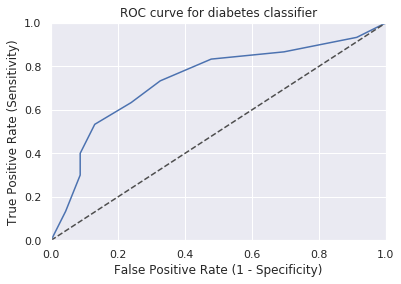

In [28]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [29]:
auc(fpr, tpr)

0.7391304347826086

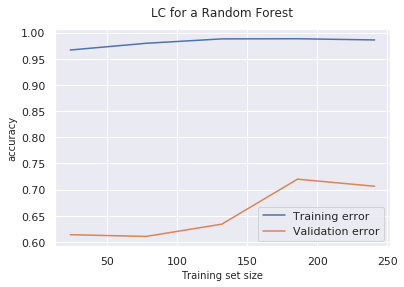

In [30]:
learning_curves(model_rf, 'Random Forest', score = 'accuracy')

In [31]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [33]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [34]:
model2_rf = rf_random.best_estimator_
new_score = model2_rf.fit(X_train, y_train).score(X_test, y_test)
old_score = model_rf.fit(X_train, y_train).score(X_test, y_test)
print('so improvement is {:0.2f}%'.format(100*(new_score-old_score)/old_score))

so improvement is 8.93%


In [35]:
model_rf.fit(X_train, y_train).score(X_test, y_test)

0.8026315789473685

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [False],
    'max_depth': [25, 30, 35, 40],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1400, 1600, 1800, 2000]
}

grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 16.4min finished


In [37]:
model3_rf = grid_search.best_estimator_
new_score3 = model3_rf.fit(X_train, y_train).score(X_test, y_test)
new_score2 = model2_rf.fit(X_train, y_train).score(X_test, y_test)
print('so improvement is {:0.2f}%'.format(100*(new_score3-new_score2)/new_score2))

so improvement is -3.28%


In [38]:
y_pred = model3_rf.predict(X_test)
y_pred_quant = model3_rf.predict_proba(X_test)[:, 1]
cm  = confusion_matrix(y_test, y_pred)
print(cm)

[[39  7]
 [10 20]]


In [39]:
for i in np.linspace(0.20,0.5, num = 10):
    print('\n for threshold {:0.2f} \n'.format(i))
    y_pred = (y_pred_quant>i).astype(int)
    cm  = confusion_matrix(y_test, y_pred)
    print(cm)


 for threshold 0.20 

[[19 27]
 [ 2 28]]

 for threshold 0.23 

[[26 20]
 [ 2 28]]

 for threshold 0.27 

[[28 18]
 [ 3 27]]

 for threshold 0.30 

[[30 16]
 [ 3 27]]

 for threshold 0.33 

[[32 14]
 [ 3 27]]

 for threshold 0.37 

[[33 13]
 [ 3 27]]

 for threshold 0.40 

[[34 12]
 [ 3 27]]

 for threshold 0.43 

[[34 12]
 [ 5 25]]

 for threshold 0.47 

[[39  7]
 [ 6 24]]

 for threshold 0.50 

[[39  7]
 [10 20]]


In [40]:
y_pred = (y_pred_quant > 0.47).astype(int)

total=sum(sum(cm))

sensitivity = cm[0,0] / (cm[0,0] + cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1] / (cm[1,1] + cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.7959183673469388
Specificity :  0.7407407407407407


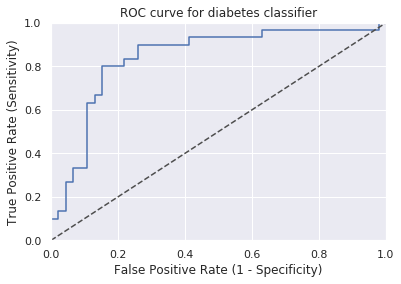

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [42]:
auc(fpr, tpr)

0.839855072463768

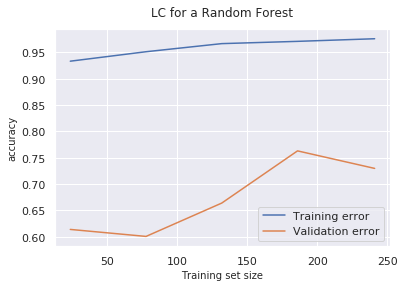

In [43]:
learning_curves(model3_rf, 'Random Forest', score = 'accuracy')

Seems like its overfitting so feature reduction is option we have